In [ ]:
!pip install geopandas

     |████████████████████████████████| 994 kB 5.1 MB/s 
     |████████████████████████████████| 6.6 MB 28.0 MB/s 
     |████████████████████████████████| 15.4 MB 38 kB/s 


In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import requests
import shapely
import matplotlib.pyplot as plot
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
travel_times = pd.read_csv('/content/gdrive/MyDrive/Uber Vienna/Travel_Times.csv')
vienna_zahl_hourly = pd.read_csv('/content/gdrive/MyDrive/Uber Vienna/vienna-statistical_areas-2020-1-All-HourlyAggregate (1).csv')

In [ ]:
travel_times.head()

,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Date Range,Mean Travel Time (Seconds),Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds)
0,573,Zone 02077,10,Zone 10151,"3/1/2020 - 3/31/2020, Every day, Daily Average",820,631,1065
1,573,Zone 02077,20,Zone 01065,"3/1/2020 - 3/31/2020, Every day, Daily Average",769,589,1002
2,573,Zone 02077,33,Zone 09055,"3/1/2020 - 3/31/2020, Every day, Daily Average",836,616,1134
3,573,Zone 02077,37,Zone 03039,"3/1/2020 - 3/31/2020, Every day, Daily Average",856,692,1058
4,573,Zone 02077,84,Zone 10234,"3/1/2020 - 3/31/2020, Every day, Daily Average",859,616,1197


In [ ]:
vienna_zahl_hourly.head(5)

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
0,244,53,18,642.32,112.57,632.56,1.19
1,1164,994,20,352.95,99.71,340.06,1.31
2,1184,794,20,260.82,53.83,256.14,1.20
3,246,33,18,849.92,124.92,841.00,1.16
4,1315,84,20,753.77,138.39,742.96,1.18


In [ ]:
mean_travel_time_by_hour_of_day = vienna_zahl_hourly.groupby('hod')['mean_travel_time'].mean()/60

In [ ]:
mean_travel_time_by_hour_of_day

hod
0      9.649543
1      9.536089
2      9.313736
3      9.333486
4      9.385830
5      9.396732
6      9.701923
7     11.239536
8     11.493558
9     10.522977
10    10.173827
11    10.235249
12    10.460407
13    10.608802
14    10.773768
15    11.333210
16    11.585647
17    12.141248
18    11.863259
19    10.692714
20     9.923627
21     9.574231
22     9.791870
23     9.830704
Name: mean_travel_time, dtype: float64

Text(0, 0.5, 'Mean travel time in mins')

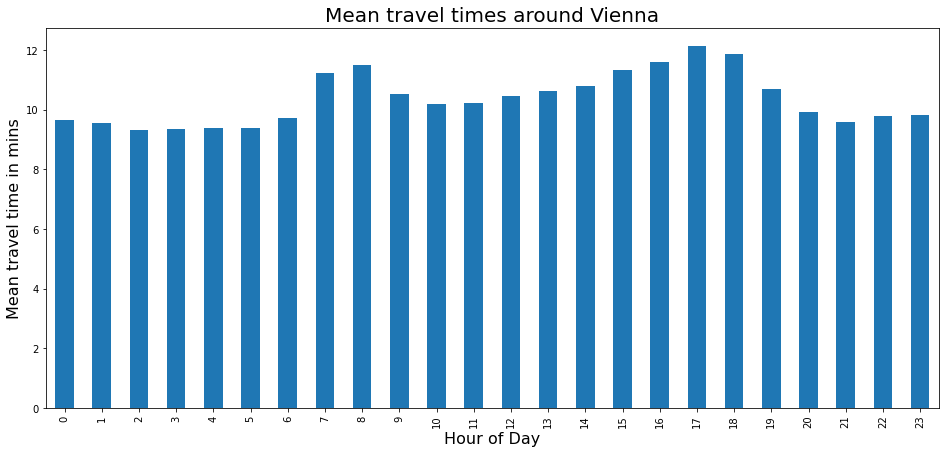

In [ ]:
plt = mean_travel_time_by_hour_of_day.plot(kind="bar", figsize=(16,7))
plt.set_title('Mean travel times around Vienna', fontsize=20)
plt.set_xlabel('Hour of Day', fontsize = 16)
plt.set_ylabel('Mean travel time in mins', fontsize = 16)

Text(0, 0.5, 'Std Dev off travel time in mins')

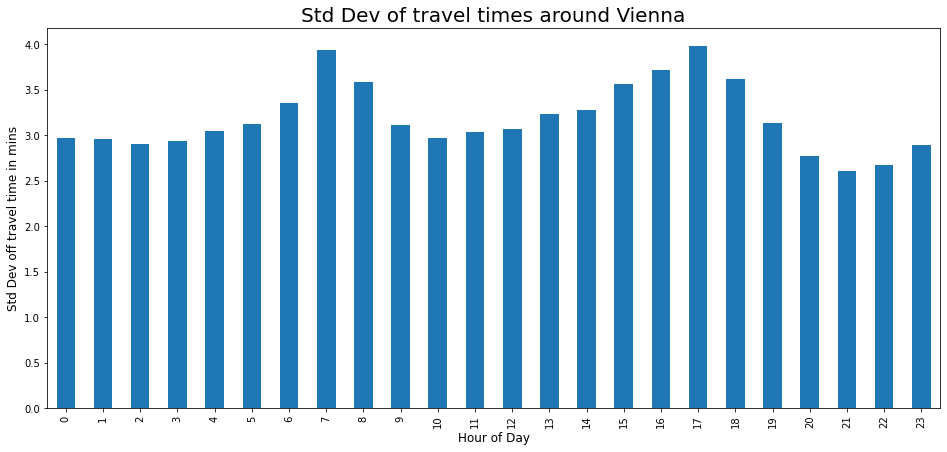

In [ ]:
std_dev_travel_time_by_hour_of_day = vienna_zahl_hourly.groupby('hod')['standard_deviation_travel_time'].mean()/60
plt = std_dev_travel_time_by_hour_of_day.plot(kind="bar", figsize = (16,7))
plt.set_title('Std Dev of travel times around Vienna', fontsize =20)
plt.set_xlabel('Hour of Day', fontsize = 12)
plt.set_ylabel('Std Dev off travel time in mins', fontsize = 12)

In [ ]:
std_dev_travel_time_by_hour_of_day

hod
0     2.964122
1     2.963593
2     2.906688
3     2.936593
4     3.043053
5     3.126645
6     3.353020
7     3.932454
8     3.589349
9     3.107227
10    2.974156
11    3.030190
12    3.067345
13    3.231839
14    3.280378
15    3.558387
16    3.719450
17    3.984655
18    3.619940
19    3.128963
20    2.771055
21    2.604873
22    2.672649
23    2.888623
Name: standard_deviation_travel_time, dtype: float64

In [ ]:
vienna = gpd.read_file('/content/gdrive/MyDrive/Uber Vienna/vienna_statistical_areas.json')

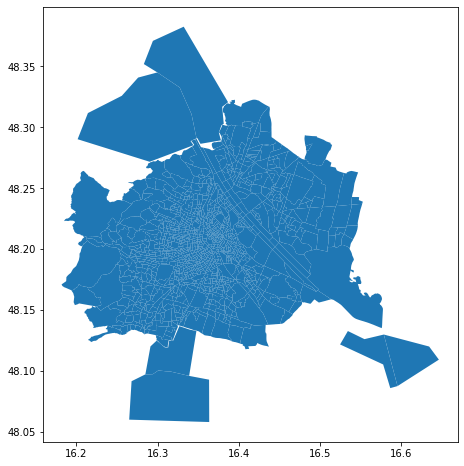

In [ ]:
vienna.plot(figsize = (8, 8))

In [ ]:
vienna.head()

,ZGEB,SE_SDO_ROW,MOVEMENT_ID,DISPLAY_NAME,geometry
0,13082,722380.0,1,Zone 13082,"POLYGON ((16.28029 48.16757, 16.28353 48.16799..."
1,02035,722381.0,2,Zone 02035,"POLYGON ((16.37703 48.21906, 16.37665 48.21902..."
2,22070,722382.0,3,Zone 22070,"POLYGON ((16.45994 48.24470, 16.46146 48.24788..."
3,16012,722383.0,4,Zone 16012,"POLYGON ((16.33449 48.21456, 16.33723 48.21491..."
4,16040,722384.0,5,Zone 16040,"POLYGON ((16.31008 48.21472, 16.31030 48.21467..."


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


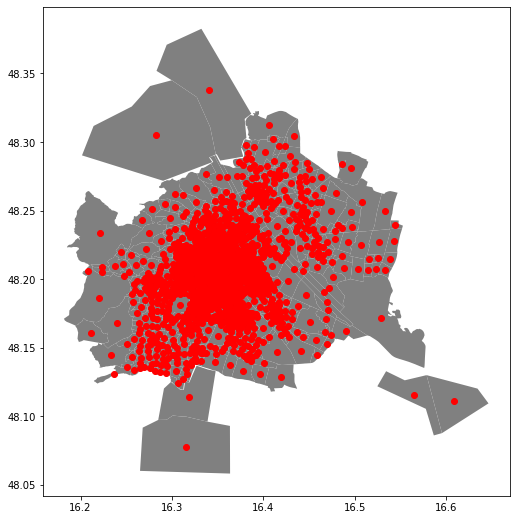

In [ ]:
vienna = vienna.drop(columns=['MOVEMENT_ID'])
vienna_c = vienna.copy()
vienna_c.geometry = vienna_c['geometry'].centroid
fig, ax = plot.subplots(figsize=(9,9))
vienna.plot(color='grey',ax=ax)
vienna_c.plot(color='red',ax=ax)

In [ ]:
id_to_dest = travel_times[['Destination Movement ID', 'Destination Display Name']]
id_to_dest.columns = ['id', 'name']
id_to_dest.head()

,id,name
0,10,Zone 10151
1,20,Zone 01065
2,33,Zone 09055
3,37,Zone 03039
4,84,Zone 10234


In [ ]:
from shapely.geometry import Point
import random

# The number of rows with random points to be created corresponding to each row in source df
number = 3

def random_points_in_polygon(number, polygon):
    points = []
    min_x, min_y, max_x, max_y = polygon.bounds
    i= 0
    while i < number:
        point = Point(random.uniform(min_x, max_x), random.uniform(min_y, max_y))
        if polygon.contains(point):
            points.append(point)
            i += 1
    return points

def diversify_geo_data(df):
    new_df = gpd.GeoDataFrame()
    common_columns = df.columns
    common_columns.tolist().remove('geometry')
    for row in df.itertuples():
        points = random_points_in_polygon(number, row.geometry)
        for point in points:
            tmp = gpd.GeoDataFrame(columns=df.columns, data=[list(row[1:4]) + [point]])
            new_df = new_df.append(tmp, ignore_index=True)
    return new_df
            

diversified_points = diversify_geo_data(vienna)
diversified_points.sample(5)

,ZGEB,SE_SDO_ROW,DISPLAY_NAME,geometry
545,23080,722915.0,Zone 23080,POINT (16.29859 48.15502)
581,10065,722927.0,Zone 10065,POINT (16.36963 48.17712)
3726,23171,723496.0,Zone 23171,POINT (16.36642 48.14260)
634,01067,723297.0,Zone 01067,POINT (16.36700 48.21075)
174,06035,722352.0,Zone 06035,POINT (16.34175 48.19289)


In [ ]:
diversified_points.shape

(4110, 4)

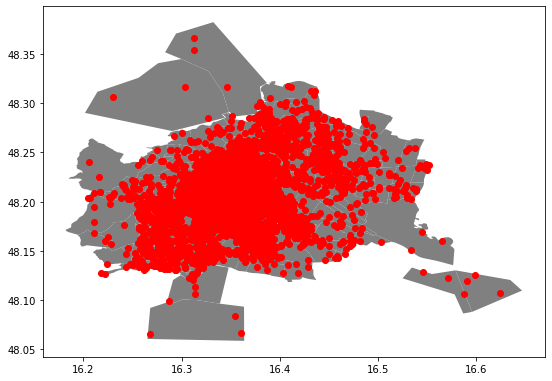

In [ ]:
fig, ax = plot.subplots(figsize=(9,9))
vienna.plot(color='grey',ax=ax)
diversified_points.plot(color='red',ax=ax)

In [ ]:
time_df = pd.merge(vienna_zahl_hourly, id_to_dest, left_on=['sourceid'], right_on=['id'], how='inner')
time_df = time_df.drop(columns=['id', 'geometric_mean_travel_time', 'geometric_standard_deviation_travel_time'])
time_df = time_df.rename(columns={'name': 'Source Name'})
time_df = pd.merge(time_df, id_to_dest, left_on=['dstid'], right_on=['id'], how='inner')
time_df = time_df.drop(columns=['id'])
time_df = time_df.rename(columns={'name': 'Destination Name'})
time_df = time_df.sort_values(by=['sourceid', 'dstid', 'hod'])
time_df.tail(5)

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,Source Name,Destination Name
194265,1365,1347,20,1588.33,205.44,Airport,Zone 15046
194260,1365,1347,21,1676.74,398.81,Airport,Zone 15046
194262,1365,1347,22,1592.66,234.92,Airport,Zone 15046
194253,1365,1347,23,1598.14,278.21,Airport,Zone 15046
342816,1365,1365,23,323.97,265.26,Airport,Airport


In [ ]:
vienna_c.shape

(1370, 4)

In [ ]:
diversified_points.shape

(4110, 4)

In [ ]:
full_vienna = vienna_c.append(diversified_points, ignore_index=True)
full_vienna.shape

(5480, 4)

In [ ]:
full_vienna.head()

,ZGEB,SE_SDO_ROW,DISPLAY_NAME,geometry
0,13082,722380.0,Zone 13082,POINT (16.28412 48.16497)
1,02035,722381.0,Zone 02035,POINT (16.37500 48.22015)
2,22070,722382.0,Zone 22070,POINT (16.47367 48.24935)
3,16012,722383.0,Zone 16012,POINT (16.33527 48.21359)
4,16040,722384.0,Zone 16040,POINT (16.31241 48.21359)


In [ ]:
time_df2 = pd.merge(time_df, full_vienna, left_on=['Source Name'], right_on=['DISPLAY_NAME'], how='inner')
#time_df2 = time_df2.drop(columns=['DISPLAY_NAME'])
time_df2 = time_df2.rename(columns = {'DISPLAY_NAME': 'Source Name', 'geometry': 'Source Geometry'})
time_df2 = pd.merge(time_df2, full_vienna, left_on=['Destination Name'], right_on=['DISPLAY_NAME'], how='inner')
#time_df2 = time_df2.drop(columns=['DISPLAY_NAME'])
time_df2 = time_df2.rename(columns = {'DISPLAY_NAME': 'Destination Name', 'geometry': 'Destination Geometry'})
time_df2.sample(3)

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,Source Name,Destination Name,ZGEB_x,SE_SDO_ROW_x,Source Name,Source Geometry,ZGEB_y,SE_SDO_ROW_y,Destination Name,Destination Geometry
3785018,383,843,22,113.01,98.35,Zone 10150,Zone 10114,10150,722451.0,Zone 10150,POINT (16.39446 48.16172),10114,722875.0,Zone 10114,POINT (16.36826 48.16162)
1985979,268,421,11,102.29,139.51,Zone 02094,Zone 02093,02094,723256.0,Zone 02094,POINT (16.41498 48.21528),02093,723082.0,Zone 02093,POINT (16.40942 48.21955)
5830449,1254,1123,5,1341.87,266.90,Zone 18039,Zone 11120,18039,723498.0,Zone 18039,POINT (16.34093 48.21876),11120,723537.0,Zone 11120,POINT (16.48172 48.16749)


In [ ]:
time_df2.shape

(9048096, 15)

In [ ]:
import pickle
def save_object(obj, filename):
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)

import os.path
def file_exists(filename):
    return os.path.exists(filename)

output_path = '/content/gdrive/MyDrive/Uber Vienna/Output/'

In [ ]:
import geopy.distance

def calc_distance(x):
    src_point = (x['Source Geometry'].y, x['Source Geometry'].x)
    dest_point = (x['Destination Geometry'].y, x['Destination Geometry'].x)
    return geopy.distance.geodesic(src_point, dest_point).kilometers

filename = 'Df_for_modelling.bin'
path = output_path + filename
if file_exists(path):
    # skip to next section since the results here are already precalculated
    pass
else:
    print('Creating distance file')
    time_df2['Geodesic Distance'] = time_df2.apply(func = calc_distance, axis=1)
    df = time_df2

In [ ]:
filename = 'Df_for_modelling.bin'
path = output_path + filename
if file_exists(path):
    with open(path, 'rb') as file:
        final_df = pickle.load(file)
else:
    print('Creating final df file')
    final_df = df.copy()
    final_df['Source lat'] = final_df['Source Geometry'].apply(lambda pt: float(pt.y))
    final_df['Source long'] = final_df['Source Geometry'].apply(lambda pt: float(pt.x))
    final_df['Dest lat'] = final_df['Destination Geometry'].apply(lambda pt: float(pt.y))
    final_df['Dest long'] = final_df['Destination Geometry'].apply(lambda pt: float(pt.x))

    
features = ['Source lat', 'Source long', 'Dest lat', 'Dest long', 'hod', 'Geodesic Distance']
outcome = ['mean_travel_time']
final_df = final_df[features + outcome]

try:
    save_object(final_df, path+filename)
except:
    pass

In [ ]:
X = final_df[features]
y = final_df[outcome]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
filename = 'randomforestreg_2.bin'
path = output_path + filename

# Check if model exists in folder
if file_exists(path):
    with open(path, 'rb') as file:
        regr = pickle.load(file)
else:
    # Fit model to training data
    regr = RandomForestRegressor(max_depth=20, min_samples_leaf=5, random_state=5)
    regr.fit(X_train, np.ravel(y_train))

try:    
  save_object(regr, path)
except:
    pass

In [ ]:
# Predict model using testing data
reg_pred = regr.predict(X_test)

# Evaluate model using R2, Mean Squared Error, Root Mean Squared Error, and Mean Absolute Error
from sklearn import metrics
r2 = metrics.r2_score(y_test, reg_pred)
print('R2: {}\n'.format(r2))

mse = metrics.mean_squared_error(y_test, reg_pred)
print('MSE: {}\n'.format(mse))
print('RMSE: {}\n'.format(np.sqrt(mse)))

mae = metrics.mean_absolute_error(y_test, reg_pred)
print('MAE: {}\n'.format(mae))

R2: 0.9491616830440655

MSE: 4492.844746433581

RMSE: 67.02868599662074

MAE: 43.343786033583456



/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


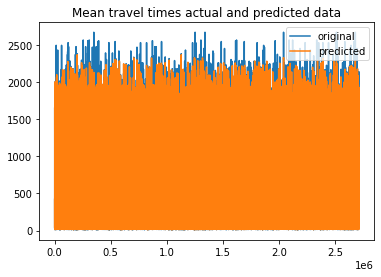

In [ ]:
# Plot original time and predicted time comparison
x_ax = range(len(y_test))

plot.plot(x_ax, y_test, label="original")
plot.plot(x_ax, reg_pred, label="predicted")
plot.title("Mean travel times actual and predicted data")

plot.legend()
plot.show()

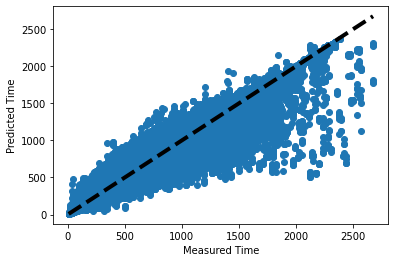

In [ ]:
fig, ax = plot.subplots()
ax.scatter(y_test, reg_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured Time')
ax.set_ylabel('Predicted Time')
plot.show()